In [8]:
import os

import torch

from torch import nn
from torch import optim

import matplotlib.pyplot as plt

In [9]:
#----------------------------------------

#training input (ook wel X)
trainingSetX = torch.tensor([
    [
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ],
    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ],
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
], dtype=torch.float).reshape(4, 9)

#----------------------------------------

#training labels (ook wel Y)
trainingSetY = torch.tensor([
    [0],
    [0],
    [1],
    [1]
], dtype=torch.float)

#----------------------------------------

#Test input (X)
testSetX = torch.tensor([
    [
        [0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]
    ],
    [
        [1, 0, 1],
        [1, 0, 1],
        [1, 1, 0]
    ],
    [
        [1, 0, 1],
        [0, 0, 0],
        [1, 0, 1]
    ],
    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ],
    [
        [1, 0, 0],
        [1, 1, 1],
        [0, 0, 1]
    ],
    [
        [0, 0, 1],
        [1, 1, 1],
        [1, 0, 0]
    ],
    [
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]
    ],
    [
        [1, 0, 0],
        [1, 1, 0],
        [1, 0, 0]
    ]
], dtype=torch.float).reshape(8, 9)

#----------------------------------------

#Test labels (Y) 
testSetY = torch.tensor([
    [0],
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
    [1]
], dtype=torch.float)

#----------------------------------------

print(trainingSetX.shape)
print(trainingSetY.shape)

#----------------------------------------

print(testSetX.shape)
print(testSetY.shape)

#----------------------------------------

torch.Size([4, 9])
torch.Size([4, 1])
torch.Size([8, 9])
torch.Size([8, 1])


In [10]:
print(trainingSetX)

tensor([[1., 1., 1., 1., 0., 1., 1., 1., 1.],
        [0., 1., 0., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 1., 1., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0., 1., 0., 1.]])


In [20]:
#----------------------------------------

device = (

    "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

)

#----------------------------------------

print(f"Using {device} device")

#----------------------------------------

Using mps device


In [12]:
#----------------------------------------

#nn.Module is de basis class voor alle neural networks
class CrossCircleDetector(nn.Module):
    
    def __init__(self, inputs, outputs):
        #inherit van de super/moeder class
        super().__init__()
        
        # Simple linear connections
        self.inOut = nn.Linear(inputs, outputs)
        
        # Sigmoid squishification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        
        return self.sigmoid(self.inOut(x))

#----------------------------------------

CrossCircleDetector(
  (inOut): Linear(in_features=9, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.4793], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.5053], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.4169], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.3750], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.4594], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.4732], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.4190], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.4264], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.44

tensor([0.9072], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9832], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0236], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0826], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9077], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9834], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0234], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0823], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9082], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9835], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 

tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0424], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9554], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9946], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0082], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0423], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9555], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9946], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0082], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0422], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9556]

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9971], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0046], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0287], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9705], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9971], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0046], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0286], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9706], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9971], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0046]

tensor([0.9778], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0031], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0218], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9779], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0031], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0218], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9779], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9981], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 

tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0023], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0176], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9822], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0023], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 0., 1., 0., 1., 0.]) tensor([0.])
tensor([0.0176], grad_fn=<SigmoidBackward0>)
tensor([0., 1., 0., 1., 1., 1., 0., 1., 0.]) tensor([1.])
tensor([0.9823], grad_fn=<SigmoidBackward0>)
tensor([1., 0., 1., 0., 1., 0., 1., 0., 1.]) tensor([1.])
tensor([0.9987], grad_fn=<SigmoidBackward0>)
tensor([1., 1., 1., 1., 0., 1., 1., 1., 1.]) tensor([0.])
tensor([0.0023]

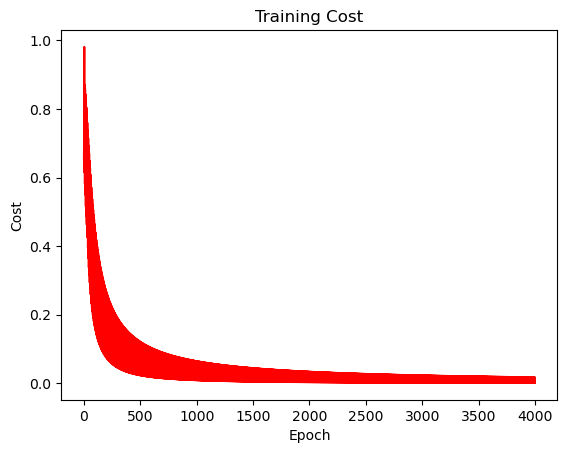

In [19]:
#----------------------------------------

#Aantal keer dat de hele trainingsset wordt 
epochs = 1000

learningRate = 0.1

#----------------------------------------

# Simplest possible network: 9 inputs and 1 output (binary: 0 when < 0.5 and 1 when > 0.5)

model = CrossCircleDetector(9, 1)

print(model)

#----------------------------------------

#Oplaan van de losses in een lijst, per epoch dus (om later te plotten)
losses = []

# Take binary cross entropy as loss function (one output interpreted as binary)
lossFunction = nn.BCELoss()

# Use stochastic gradient descent as optimizer, use weights and biases of model
gradientDescent = torch.optim.SGD(model.parameters(), lr=learningRate)

#----------------------------------------

for i in range(epochs):
    
    for x, y in zip(trainingSetX, trainingSetY):
        print(x,y)
        # Reset the gradient delta's (dw, db)
        gradientDescent.zero_grad()

        # Forward step
        yhat = model(x)
        print(yhat)
        # Compute loss
        loss = lossFunction(yhat, y)

        # Keep track of loss
        losses.append(loss.item())

        # Apply gradient descent (via backpropagation)
        loss.backward()

        # Use w += -step * dw * learnRate
        gradientDescent.step()

#----------------------------------------

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(4 * epochs)], losses, 'red')
plt.show()

#----------------------------------------

In [15]:
len(losses)

4000

In [17]:
#----------------------------------------

# Let's compare
for x, y in zip(testSetX, testSetY):

    print(f"actual: {round(y.item())}, predicted: {model(x).item()}, rounded: {round(model(x).item())}")
    
#----------------------------------------

actual: 0, predicted: 0.008374741300940514, rounded: 0
actual: 0, predicted: 0.012495358474552631, rounded: 0
actual: 0, predicted: 0.17408804595470428, rounded: 0
actual: 0, predicted: 0.01701238378882408, rounded: 0
actual: 1, predicted: 0.9937059283256531, rounded: 1
actual: 1, predicted: 0.9963751435279846, rounded: 1
actual: 1, predicted: 0.9982278943061829, rounded: 1
actual: 1, predicted: 0.9986201524734497, rounded: 1
